Created by: Eduardo Medina

Custome DataSets

Data: 04/03/25

Comments: Data's been gotten from the GitHub repository "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"

# PyTorch Custom Datasets.

## 0.- Importing PyTorch and setting up device-agnostic code.

In [ ]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu124'

In [ ]:
#Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 1.- Get some data

OUr dataset is a subset of the Food101 dataset.

Food101 statrs 101 clasees of food and 1000 images per class.

OUr dataset starts with 3 classes of food and only 10% of the image (~75 training, 25 testing).

In [ ]:
from os import write
import requests
import zipfile
from pathlib import Path

#eEtup path to a data folder.
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If tge image folder doesn't exit, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
  print(f"{image_path} does not directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

#Download pizza, steak  and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloaded")
  f.write(request.content)

#Unzip pizza, steak and sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not directory, creating one...
Downloaded
Unzipping pizza, steak and sushi data...


##2.- Becoming one with the data (data prepartion and exploration )

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [ ]:
#Setup train and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

###2.-Visualizing and image  

data/pizza_steak_sushi/train/pizza/2760984.jpg
pizza
RAndom image path: data/pizza_steak_sushi/train/pizza/2760984.jpg
Image class: pizza
Image height: 512
Image width: 512


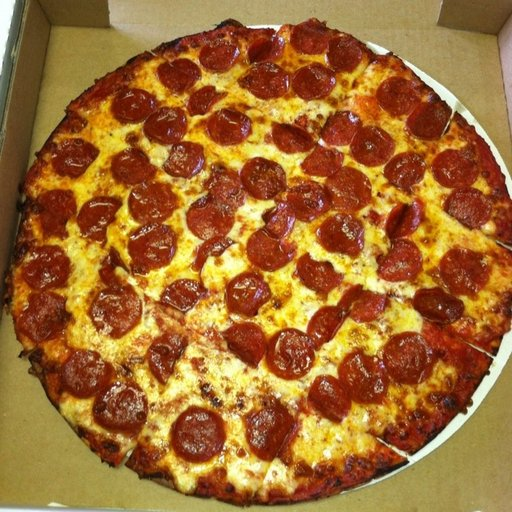

In [ ]:
import random
from PIL import Image
#random.seed(42)

#Image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

#Get image class from the path name
image_class = random_image_path.parent.stem
print(image_class)

#Open image
img = Image.open(random_image_path)

#Print metadata
print(f'RAndom image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

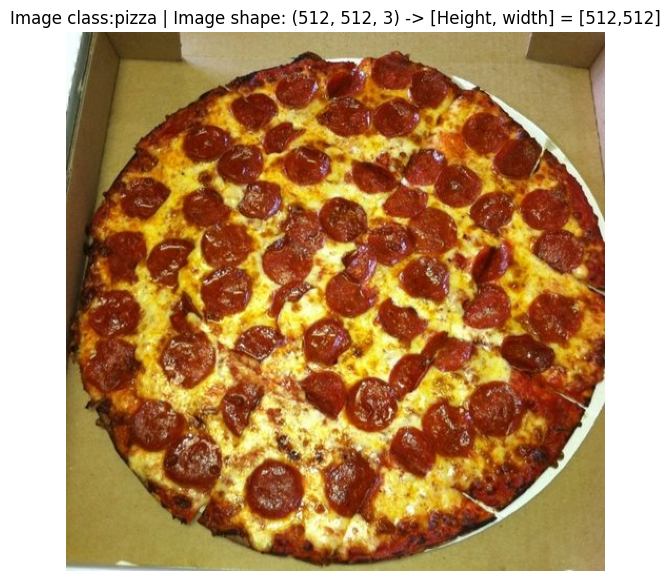

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

#Plot the image with plt
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class:{image_class} | Image shape: {img_as_array.shape} -> [Height, width] = [{img.height},{img.width}]')
plt.axis(False)

##3.- Transforming data

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
#Write a transform for image
data_transform = transforms.Compose([
    #Resize image 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),
    #Convert image to tensor
    transforms.ToTensor()
])

data_transform(img).shape

torch.Size([3, 64, 64])

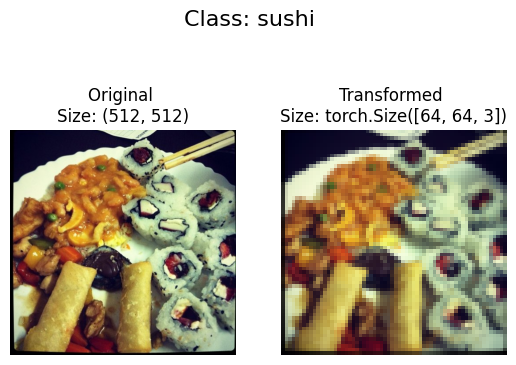

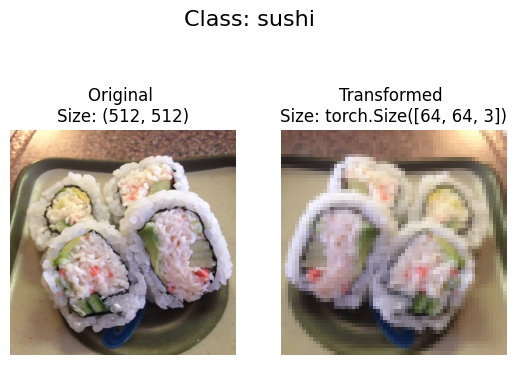

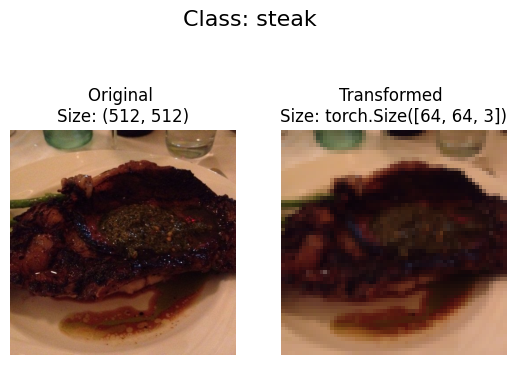

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Selects random images from a path of images and loads/transforms them
  then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1,ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      #Transform and plot image
      transformed_image = transform(f).permute(1,2,0)#[C,W,H] -> [W,H,C]
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform = data_transform,
                        n=3,
                        seed=42)







## 4.- Option 1: Loading image data using `ImageFolder`



In [ ]:
#Use imageFolder
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,#A transform for the data
                                  target_transform=None)#A transform for the label/target


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
#As a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#CHeck the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

Image shape: torch.Size([3, 64, 64])
Label: pizza
Image datatype: torch.float32
Label datatype: <class 'int'>
Shape before permute: torch.Size([3, 64, 64]) --> After permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Class: pizza')

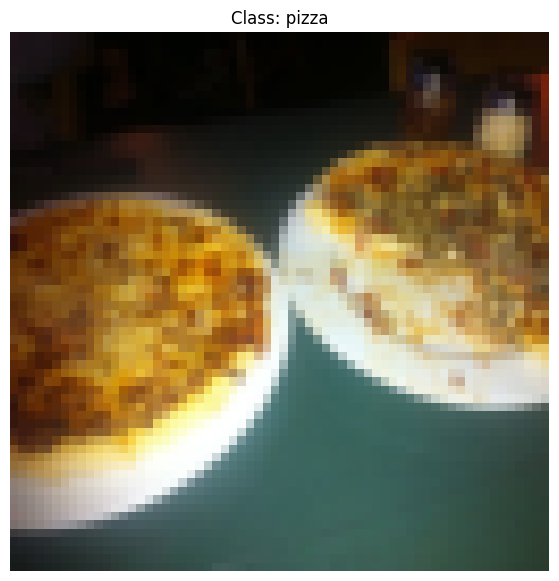

In [ ]:
# Index on the train_data Dataset to fet a single image and label
numImage = 0
img, label = train_data[numImage][0], train_data[numImage][1]
print(f"Image shape: {img.shape}")
print(f"Label: {class_names[label]}")
print(f'Image datatype: {img.dtype}')
print(f'Label datatype: {type(label)}')

#Rearrange the order dimensions
img_permute = img.permute(1,2,0)

#Print out different shapes
print(f"Shape before permute: {img.shape} --> After permute: {img_permute.shape}")

#PLot image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image shape: {img_permute.shape}")
plt.axis("off")
plt.title(f"Class: {class_names[label]}")

### 4.1 Turn loaded images into DataLoader's

In [ ]:
import os
os.cpu_count()

2

In [ ]:
#Turn datasets into DAtaLoader
from torch.utils.data import DataLoader
batchSize = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batchSize,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batchSize,
                             num_workers=os.cpu_count(),
                             shuffle=False)
len(train_dataloader), len(test_dataloader )

(225, 75)

In [ ]:
img,label = next(iter(train_dataloader))


#BAtch size will now be 1
print(f"Image shape:\n\t {img.shape} -> [Batch size, Color channels,Height,Widtj]")
print(f"Label: {class_names[label]}")

Image shape:
	 torch.Size([1, 3, 64, 64]) -> [Batch size, Color channels,Height,Widtj]
Label: sushi


## 5.- Option 2: Loading Image data with a Custom DataSet

In [ ]:
from PIL import Image
from torch.utils.data import Dataset
from pathlib import Path
from torchvision import transforms
from typing import Tuple, Dict, List


In [ ]:
#Instance of torchvision.datasets.ImageFOlder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1.- Creating a helper function to get class names

In [ ]:
#Setup path for target directory
target_directory = train_dir
print(f'Target dir: {target_directory}')

#Get the class names from the target dir
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])# <- <- <- <- <- <- <- <- <- <- <- <-

class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  #1. Get the class names by scanning the target directory
  classes  = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}")

  #Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2.- Create a custom Dataset to replicate ImageFolder

In [ ]:
#Write a custom dataset class
from torch.utils.data import Dataset

#1.- Subclass torch.utils.data.DAtaset
class ImageFolderCustom(Dataset):
  #Initiate our custom dataset
  def __init__(self,
               targ_dir: str,
               transform = None,
               ):
    #Create a class attributes
    self.paths = list(Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform

    #Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)
  #Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  #Overwrite __len__()
  def __len__(self) -> int:
    return len(self.paths)

  #Overwrite __getitem__()
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label(X,y)."
    image = self.load_image(index)
    class_name = self.load_image(index).parent.stem#expects paths in format: data_solder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    #Transform if necessary
    if self.transform:
      return self.transform(image), class_idx #Return data, label(X,y)
    else:
      return image, class_idx #Return untransformed image and label






In [ ]:
# Create a trnasform.
from torchvision import transforms

# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])



In [ ]:
#Test out IMageFOlderCUstom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7efab079ead0>,
 <__main__.ImageFolderCustom at 0x7efab117ffd0>)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7efab079ead0>,
 <__main__.ImageFolderCustom at 0x7efab117ffd0>)

In [ ]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#Check for equality between original Dataset and ImageFolderCustom Dataset.
print(train_data_custom.class_to_idx == train_data.class_to_idx)
print(test_data_custom.class_to_idx == test_data.class_to_idx)

True
True


### 5.3.- Create a function to display random images.

In [ ]:
#Create a function to taake in a dataset
def display_random_images(
    dataset: torch.utils.data.Dataset,
    classes: List[str] = None,
    n: int = 10,
    display_shape: bool = True,
    seed: int = None):
  #2.- Adjust display if n is too high
  if n>10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10: setting to 10 and removing shape display.")
  #3.- Set the seed
  if seed:
    random.seed(seed)

  #4.- Get randmo samples indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  #5.-SEtup plot
  plt.figure(figsize=(16,8))

  #6.- Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7.- Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    #PLot adjustes samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f'Class: {classes[targ_label]}'
      if display_shape:
        title = title+f'\nshape: {targ_image_adjust.shape}'
    plt.title(title)




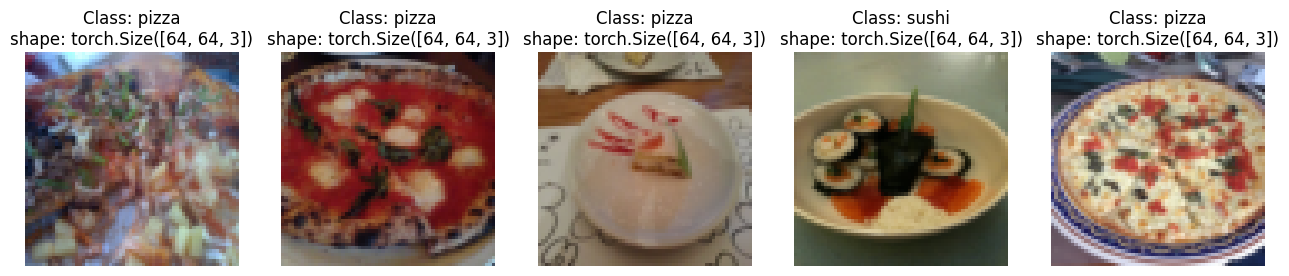

In [ ]:
display_random_images(dataset=train_data,
                      classes=class_names,
                      n=5,
                      seed=None)

### 5.4.- Custom loaded images into DataLoader's

In [ ]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7efaadd35210>,
 <torch.utils.data.dataloader.DataLoader at 0x7efab07ba2d0>)

## 6.- Other forms of transform (augmentations)

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
#Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/2021381.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1138695.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/424994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/121940.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1552504.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2004525.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/748830.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2267190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1615453.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2574453.jpg')]

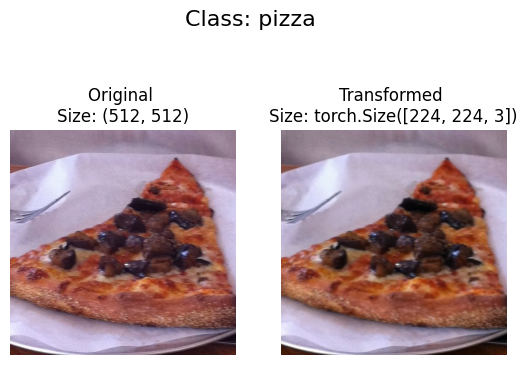

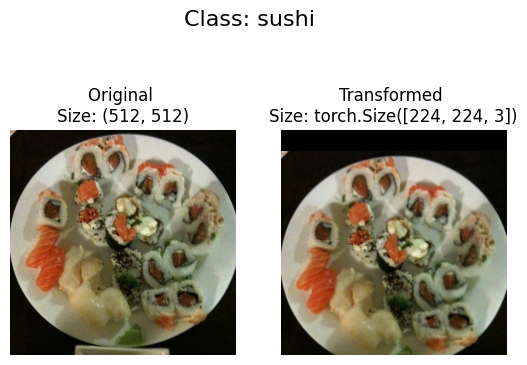

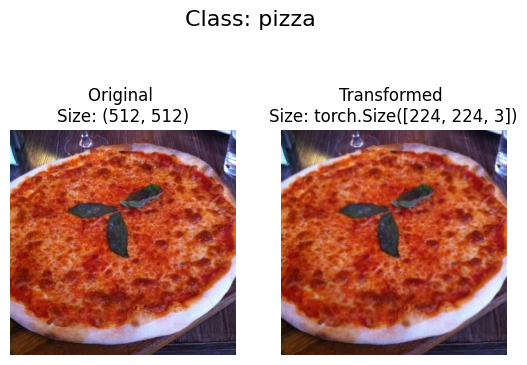

In [ ]:
#PLt random images
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed=None)



##7.- Model 0: TinyVGG without data augmentation

###7.1.- Creating trtansforms and loading data for Model0.

In [ ]:
#Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [ ]:
#1.- Load and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform,
                                         target_transform=None)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform,
                                        target_transform=None)

#3.-Turn the data sets into DAtaLoaders
batchSize = 32
numWorkers = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=batchSize,
                                     num_workers=numWorkers,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=batchSize,
                                    num_workers=numWorkers,
                                    shuffle=False)


###7.2 Create TinyVGG model Class
<< TinyVGG is a type of CNN>>

---



In [ ]:
class TinyVGG(nn.Module): #This part is only for inheritance
  """
  Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from
  """
  # def __init__  to introduce the parameters of  the class
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int #NUmber of classes in data
               ) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)#Defaul stride value is same as kernel_size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, #*x.shape[2]*x.shape[3]
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

###7.3 Try a forward pass on a single image (to test the models)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))

In [ ]:
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

###7.4.-Use torchinfo to get an idea if the shapes going through our model.

In [ ]:
#INstall torchinfo
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo



from torchinfo import summary
summary(model=model_0,
        input_size=(1,3,64,64) #Same as Resize image 64x64 from the transform
        )

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

###7.5 Create train and test loops functions

In [ ]:
#Create train_step()
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device: torch.device = device
              ):
  #Put model in train mode
  model.train()

  #Setup train loss and train accuracy values
  train_loss, train_acc = 0,0

  #Loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    #Send data to target device
    X,y = X.to(device), y.to(device)

    #1.-Forward pass
    y_pred = model(X) # output model logits

    #2.-Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    #3.-Optimizer zero grad
    optimizer.zero_grad()

    #4.-Loss backward
    loss.backward()

    #5.-Optimizer step
    optimizer.step()

    #Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  #Adjust metrics to get the average loss and accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc  #Per epoch


In [ ]:
#Create a test step fucntion
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device
              ):
  #Put model in eval mode
  model.eval()

  #Setpu test loss and test accuracy values
  test_loss, test_acc = 0,0

  #Turn on inference context manager
  with torch.inference_mode():
    #Loop through DataLoader batches
    for batch, (X,y) in enumerate(dataloader):
      #Send data to target device
      X,y = X.to(device), y.to(device)

      #1.- FOrward pass
      test_pred_logits = model(X)

      #2.-Calculate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      #CAlculate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  #Adjust metrics to get averagge loss and acu¡curacy per batch
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss, test_acc


### 7.6 Creating a train() function to combine train_step() and train_test()

In [ ]:
from tqdm.auto import tqdm

#Create a train function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = device
          ):
  #2.- Create an empty results dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  #3.- Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    #4.- Print out what's happening
    print(f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss} | "
        f"Test acc: {test_acc:.4f}")
    #5.- Update results in dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #Return the results
  return results


###7.7.- Train and evaluate model_0

In [ ]:
#Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs
numEpochs = 5

#Rectreate an instance of TinyVGG
model_0 = TinyVGG(input_shape= 3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

#Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

#Start the timer
from timeit import default_timer as timer
start_time = timer()

#TRAIN MODEL_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=numEpochs)

#End the timer
end_time = timer()

print(f'Total training time: {end_time-start_time:.3f} seconds :D')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362075010935466 | Test acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1621707677841187 | Test acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.169488827387492 | Test acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343015034993489 | Test acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.14342466990153 | Test acc: 0.1979
Total training time: 18.453 seconds :D


###7.8 Plot the loss curves oof model_0

In [ ]:
#GEt the model_0_results keys
model_0_results.keys()
def plotLossCurves(results: dict[str,List[float]]):
  """
  Plots training curves of a results dictionary.

  Args:
    results (dict): dictionary
  """
  #Get the loss values of the results dictionary (training and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  #Get the accuracy values of the results dictionary (training and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  #Figure out how many epochs there were
  epochs = range(len(results['train_loss']))

  #Setup a plot
  plt.figure(figsize=(15,7))

  #Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.grid()

  #Plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.grid()

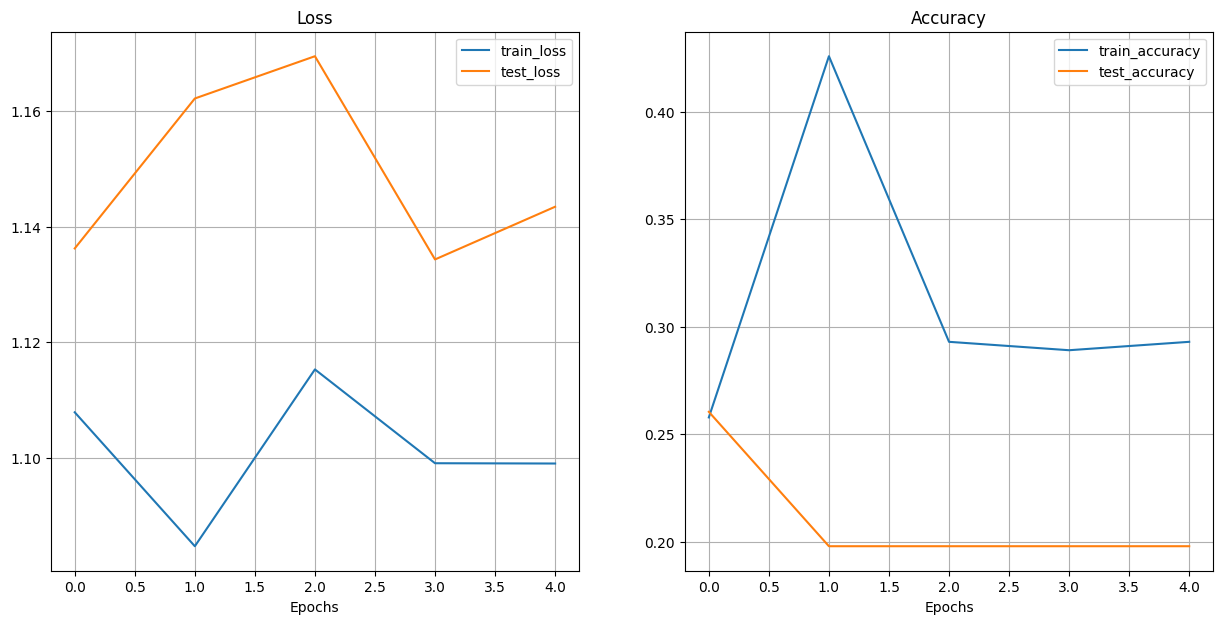

In [ ]:
plotLossCurves(model_0_results)

##8.-What should an ideal loss curve look like?

##9.-Model 1: TinyVGG with Data Augmentation

### 9.1.- Create transform with data augmentation

In [ ]:
train_transforms_trivial = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

###9.2 Create train and test Dataset's and DataLoader with augmentation.

In [ ]:
#trun image folders into DataSets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transforms_trivial,
                                            target_transform=None)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transforms_simple,
                                        target_transform=None)

In [ ]:
#Turn our dataset into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                         batch_size=BATCH_SIZE,
                                         num_workers=NUM_WORKERS,
                                         shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS,
                                   shuffle=False)


In [ ]:
TinyVGG(input_shape=3,
        hidden_units=10,
        output_shape=len(train_data.classes)).to(device)

### 9.3.- Construct and train model_1

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_1


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs
numEpochs = 5

#Rectreate an instance of TinyVGG
#Loss function
loss_fn = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

#Start timer
from timeit import default_timer as timer
start_time = timer()

#TRAIN MODEL_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=numEpochs)

#End timer
end_time = timer()

print(f'Total training time for model_1 is: {end_time-start_time:.3f} seconds :D')



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.10621972878774 | Test acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387190222740173 | Test acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.169558008511861 | Test acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625247200330098 | Test acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.148215929667155 | Test acc: 0.2604
Total training time for model_1 is: 11.708 seconds :D


### 9.4.-Plot the loss curves

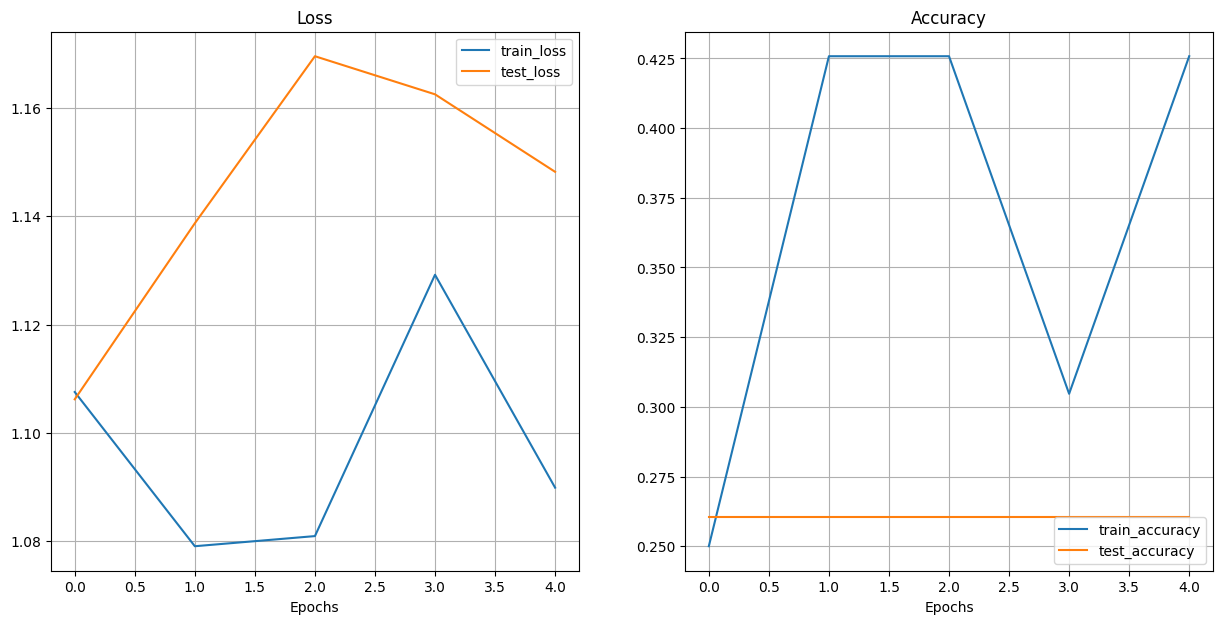

In [ ]:
plotLossCurves(model_1_results)

## 10.- Compare Results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162171,0.197917
2,1.115261,0.292969,1.169489,0.197917
3,1.099015,0.289062,1.134302,0.197917
4,1.098966,0.292969,1.143425,0.197917


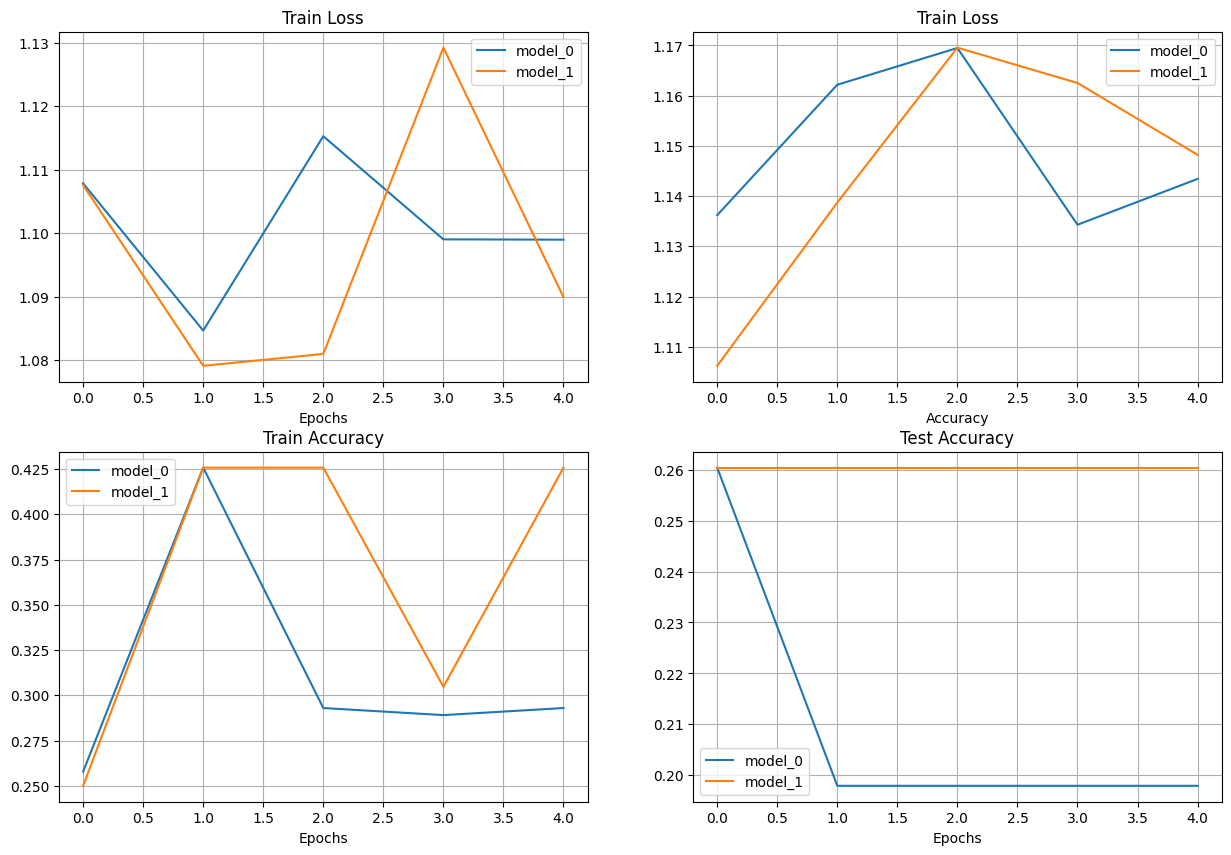

In [ ]:
# Setup a plot
plt.figure(figsize=(15,10))

#Get number od epochs
epochs = range(len(model_0_df))
#Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='model_0')
plt.plot(epochs, model_1_df['train_loss'], label='model_1')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

#Plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label='model_0')
plt.plot(epochs, model_1_df['test_loss'], label='model_1')
plt.title('Train Loss')
plt.xlabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label='model_0')
plt.plot(epochs, model_1_df['train_acc'], label='model_1')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()


plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label='model_0')
plt.plot(epochs, model_1_df['test_acc'], label='model_1')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()


In [ ]:
import requests
from pathlib import Path

custom_image_path = data_path / "some_IMage"
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    f.write(requests.get("https://raw.githubusercointent..."))